In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
pd.options.display.max_rows = 999

In [3]:
df = pd.read_csv('../data/New_Data/final.csv')

In [4]:

df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'title', 'director', 'description',
       'duration', 'year', 'budget', 'genre', 'profitable', 'is_Animation',
       'is_Biography', 'is_Action', 'is_Mystery', 'is_Sci-Fi', 'is_Comedy',
       'is_Fantasy', 'is_Sport', 'is_Thriller', 'is_Film-Noir', 'is_Drama',
       'is_Adventure', 'is_Horror', 'is_Musical', 'is_History', 'is_Crime',
       'is_Music', 'is_Family', 'is_Romance', 'is_Western', 'is_War'],
      dtype='object')

In [5]:
movies = ['title', 'director', 'profitable', 'year']
genres = ['title','year','is_Animation', 'is_Biography', 'is_Action', 'is_Mystery', 'is_Sci-Fi', 'is_Comedy', 'is_Fantasy',
         'is_Sport', 'is_Thriller', 'is_Film-Noir', 'is_Drama', 'is_Adventure', 'is_Horror', 'is_Musical',
         'is_History', 'is_Crime', 'is_Music', 'is_Family', 'is_Romance', 'is_Western', 'is_War', 'profitable']

In [6]:
df_sub = df[genres]
df_movies = df[movies]

In [7]:
df_movies.head(100)

,title,director,profitable,year
0,The Four Horsemen of the Apocalypse,Rex Ingram,1,1921
1,City Lights,Charles Chaplin,0,1931
2,Modern Times,Charles Chaplin,0,1936
3,Snow White and the Seven Dwarfs,"William Cottrell, David Hand",1,1937
4,Gone with the Wind,"Victor Fleming, George Cukor",1,1939
5,Mr. Smith Goes to Washington,Frank Capra,0,1939
6,The Wizard of Oz,"Victor Fleming, George Cukor",1,1939
7,Pinocchio,"Norman Ferguson, T. Hee",1,1940
8,Fantasia,"James Algar, Samuel Armstrong",1,1940
9,Citizen Kane,Orson Welles,1,1941


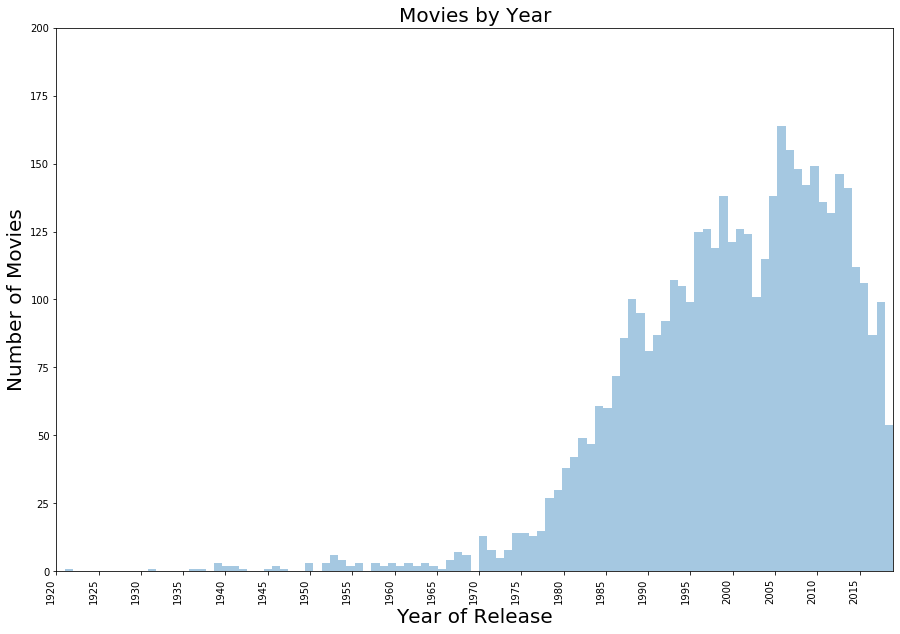

In [20]:
plt.figure(figsize = (15,10))
plt.title('Movies by Year', size = 20)
sns.distplot(df_movies.year, bins=100, kde=False)
plt.ylabel('Number of Movies', size = 20)
plt.xlabel('Year of Release', size = 20)
plt.axis([1920, 2019, 0, 200])
plt.xticks(np.arange(1920,2019, step=5), rotation = 90, ha = 'right')
plt.savefig('../New_Images/all_movies_by_year.png')

In [9]:
df_movies_grouped = df_movies.groupby(['profitable','year']).agg({'title' :'count'}).reset_index()

In [10]:
df_grouped_profit = df_movies_grouped.query('profitable > 0')
df_grouped_loss = df_movies_grouped.query('profitable == 0')
subset = ['year', 'title']
df_grouped_profit = df_grouped_profit[subset]
df_grouped_loss = df_grouped_loss[subset]

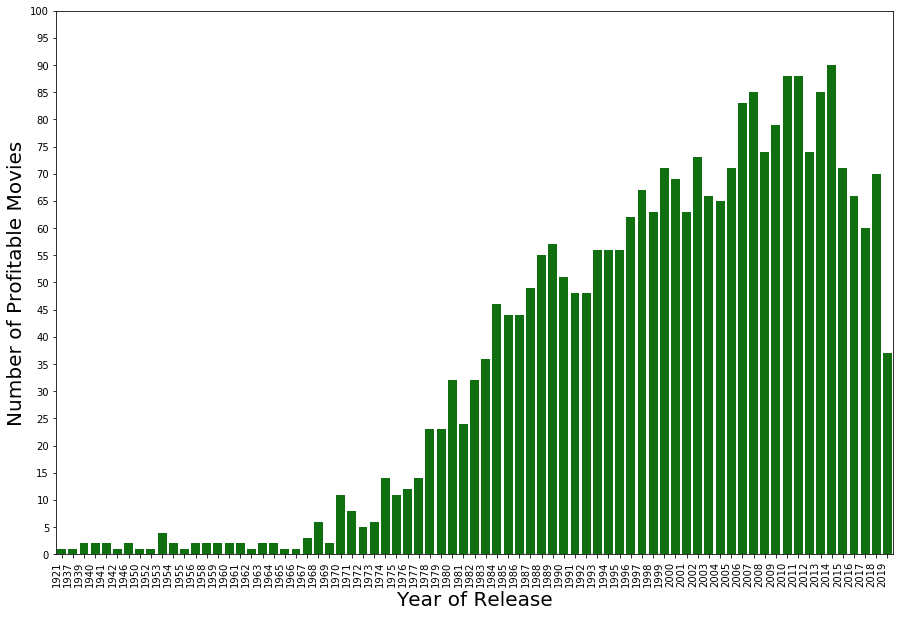

In [17]:
plt.figure(figsize = (15,10))
# plt.title('ProfitablMovies by Year', size = 20)
sns.barplot(data = df_grouped_profit, y = 'title', x = 'year', color = 'g')
# sns.barplot(data = df_grouped_loss, y = 'title', x= 'year', color = 'b')
plt.ylabel('Number of Profitable Movies', size = 20)
plt.xlabel('Year of Release', size = 20)
# plt.axis([1920, 2019, 0, 10])
plt.yticks(np.arange(0,105,5))
plt.xticks(rotation = 90, ha = 'right')
plt.savefig('../New_Images/profit_by_year.png', transparent = True)

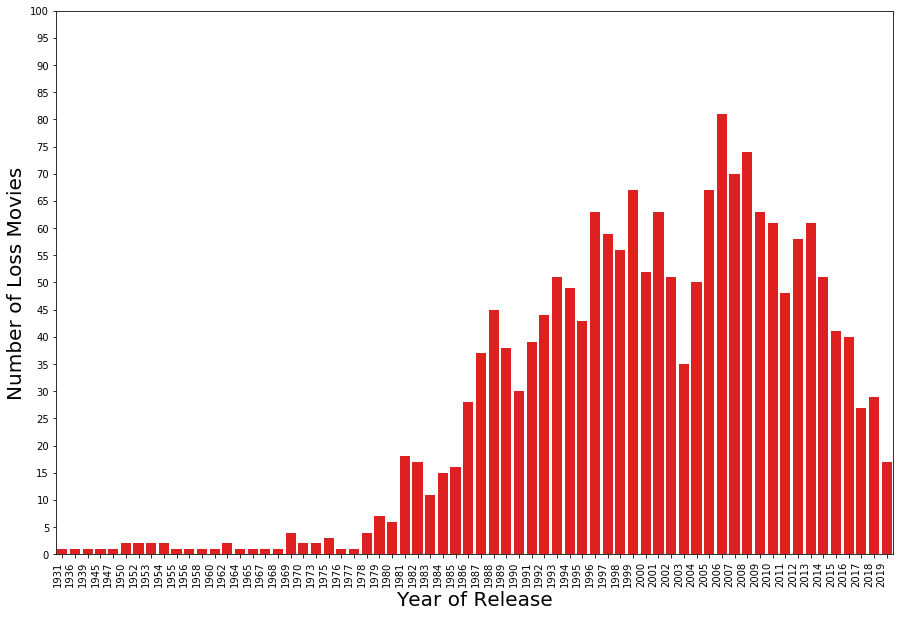

In [19]:
plt.figure(figsize = (15,10))
# plt.title('Movies by Year', size = 20)
sns.barplot(data = df_grouped_loss, y = 'title', x = 'year', color = 'r')
# sns.barplot(data = df_grouped_loss, y = 'title', x= 'year', color = 'b')
plt.ylabel('Number of Loss Movies', size = 20)
plt.xlabel('Year of Release', size = 20)
# plt.axis([1920, 2019, 0, 10])
plt.yticks(np.arange(0,105,5))
plt.xticks(rotation = 90, ha = 'right')
plt.savefig('../New_Images/loss_by_year.png', transparent = True)

In [171]:
df_sub_profit = df_sub.query('profitable == 1')
df_sub_loss = df_sub.query('profitable == 0')

In [151]:
print(df_sub_profit.sum())
print(df_sub_loss.sum())

is_Animation     162
is_Biography     125
is_Action        589
is_Mystery       202
is_Sci-Fi        210
is_Comedy       1224
is_Fantasy       213
is_Sport          73
is_Thriller      400
is_Film-Noir       1
is_Drama        1227
is_Adventure     482
is_Horror        293
is_Musical        19
is_History        36
is_Crime         465
is_Music         101
is_Family        196
is_Romance       491
is_Western        20
is_War            28
profitable      2629
dtype: int64
is_Animation      29
is_Biography      89
is_Action        275
is_Mystery       123
is_Sci-Fi         80
is_Comedy        795
is_Fantasy        90
is_Sport          71
is_Thriller      259
is_Film-Noir       3
is_Drama        1097
is_Adventure     160
is_Horror        139
is_Musical        34
is_History        42
is_Crime         384
is_Music         104
is_Family         96
is_Romance       356
is_Western        29
is_War            36
profitable         0
dtype: int64


In [172]:
top_genres = ['year','is_Action', 'is_Comedy', 'is_Drama','is_Adventure']

In [173]:
df_sub_profit = df_sub_profit[top_genres]
df_sub_loss = df_sub_loss[top_genres]

In [217]:
directors = ['title','director','profitable']

In [225]:
df_dir = df[directors]
dir_pro = df_dir.query('profitable == 1')
dir_loss = df_dir.query('profitable == 0')

In [226]:
f = df_dir.groupby('director')['title'].nunique()
p = dir_pro.groupby('director')['title'].nunique()
l = dir_loss.groupby('director')['title'].nunique()

(1, 20)

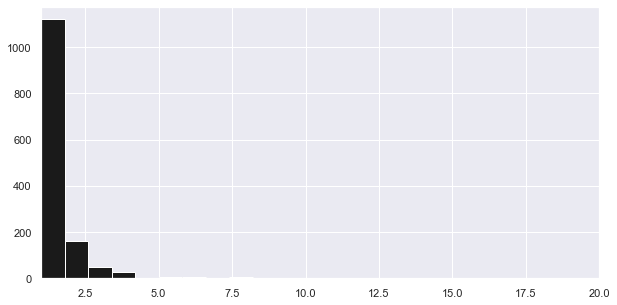

In [228]:
l.hist(bins = 20, figsize = (10,5), color = 'k')
plt.xlim(1,20)